In [7]:
import numpy as np
import matplotlib.pyplot as plt
import PoroElasticProperties as prop
%matplotlib inline

In [8]:
# definition of geomechanical properties
## would need to tweak the parameters a bit probably
k = 8.4e3  # elastic drained bulk modulus [MPa]
g = 6.8e3  # shear modulus [MPa]
b = 0.707692  # biot coefficient
M = 9.18478e3  # biot modulus [MPa]
k_u = prop.undrained_bulk_modulus(k, b, M)
perm = 0.137549e-3  # permeability
B = (k_u-k)/(b*k_u)
mu_f = 1  # fluid viscosity
rho = 1  # density
kappa = perm/mu_f  # conductivity
nu_u = prop.poisson_ratio(g, k_u)  # undrained poisson ratio
E_u = prop.young_modulus(g, k_u)  # undrained yougn modulus
nu = prop.poisson_ratio(g, k)  # poisson ratio
E = prop.young_modulus(g, k)  # young modulus
eta = b*(1-2*nu_u)/(2*(1-nu_u))  # idk what this is
p0 = 1000
c = 1

In [9]:
# we define the coordinates 
N = 1000
x = np.linspace(-1.1*c, 1.1*c, N)
y = np.linspace(-0.5*c, 0.5*c, N)
x, y = np.meshgrid(x, y)
z = x + 1j*y

In [10]:
# Z is the stress field
Z = p0*(z/np.sqrt(z*z - c*c) - 1)
sx = Z.real - Z.conj().imag*y
sy = Z.real + Z.conj().imag*y
tau = -y*Z.conj().real

epsilon = 2*(1 - nu**2)*p0*c/E
epsilon_u = 2*(1 - nu_u**2)*p0*c/E_u

xfrac = np.linspace(-c, c, 1000)
w = np.sqrt(1 - (xfrac/c)**2)*epsilon
w_u = np.sqrt(1 - (xfrac/c)**2)*epsilon_u


Text(0, 0.5, 'y (m)')

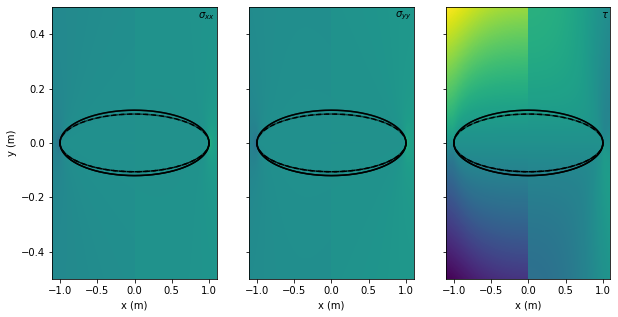

In [11]:
def crack_ellipse(x, u, ax=None, **kwargs):
    if ax is None:
        fig, ax = plt.subplots()
    else:
        fig = plt.gcf()
    
    l, = ax.plot(x, u, **kwargs)
    ax.plot(x, -u, c=l.get_color(), ls=l.get_linestyle())
    ax.plot(-x, u, c=l.get_color(), ls=l.get_linestyle())
    ax.plot(-x, -u, c=l.get_color(), ls=l.get_linestyle())

fig, axs = plt.subplots(1, 3, figsize=(10, 5), sharex='all', sharey='all')
axs[0].pcolormesh(x, y, sx, shading='auto')
axs[1].pcolormesh(x, y, sy, shading='auto')
axs[2].pcolormesh(x, y, tau, shading='auto')
text = ['$\sigma_{xx}$', '$\sigma_{yy}$', '$\\tau$']
for i, ax in enumerate(axs):
    crack_ellipse(xfrac, w, ax=ax, c='k', alpha=0.6)
    crack_ellipse(xfrac, w_u, ax=ax, c='k', ls='dashed', alpha=0.6)
    ax.set_xlabel('x (m)')
    ax.text(0.99, 0.99, text[i], transform=ax.transAxes, ha='right', va='top')

axs[0].set_ylabel('y (m)')